In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from analysis import wl_accuracy, season_record
from data_format import create_data

In [2]:
version = 6
df = pd.read_csv(f'./data/baseball/training/game_data_v{version}.csv')

In [3]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [4]:
def generate_random_results():
    results = {'away_pred': [], 'home_pred': [], 'away_true': y_test_away, 'home_true': y_test_home}
    
    for i in range(len(y_test_away)):
        results['away_pred'].append(random.randint(0, 1))
        results['home_pred'].append(1 - results['away_pred'][i])
    
    return pd.DataFrame(results)

In [5]:
results = generate_random_results()

print('RANDOM GUESSING MODEL')
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)

RANDOM GUESSING MODEL
Accuracy: 49.25925925925926%
------------------------------
Season records:
NYY: 100-62	COL: 95-67	CHC: 88-74	PIT: 88-74	LAD: 88-74	
MIN: 87-75	AZ: 85-77	STL: 85-77	KC: 85-77	NYM: 83-79	
BOS: 83-79	LAA: 82-80	OAK: 82-80	CIN: 81-81	TB: 81-81	
PHI: 81-81	SF: 80-82	DET: 79-83	TEX: 79-83	HOU: 78-84	
MIA: 77-85	BAL: 77-85	TOR: 76-86	MIL: 75-87	SD: 75-87	
ATL: 75-87	SEA: 74-88	CWS: 73-89	WSH: 71-91	CLE: 67-95	


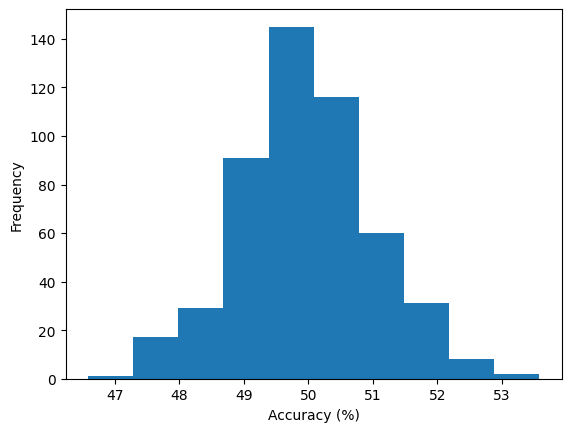

                0
count  500.000000
mean    49.966420
std      1.047279
min     46.584362
25%     49.300412
50%     49.958848
75%     50.617284
max     53.580247


In [6]:
acc = []

for i in range(500): # try 1000 - does it resemble normal distribution?
    results = generate_random_results()
    acc.append(wl_accuracy(results))

plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

print(pd.DataFrame(acc).describe())

plt.hist(acc)
plt.show()